# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Jaya Jaya Maju

- Nama: Jelvin Krisna Putra
- Email: krisnaaaputraaa@gmail.com
- Id Dicoding: krisna31

## Persiapan

### Menyiapkan library yang dibutuhkan

In [46]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

### Menyiapkan data yang akan diguankan

## Data Understanding

In [47]:
employee = pd.read_csv("employee_data.csv")

In [48]:
employee.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Preparation / Preprocessing

In [49]:
employee.describe(include="all")

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1043,NaN,961,NaN,NaN,606,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,735.500000,36.923810,0.169187,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [50]:
employee.isnull().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [51]:
employee[employee["Attrition"].isnull()].head(5)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2
5,6,29,NaN,Travel_Rarely,352,Human Resources,6,1,Medical,1,...,4,80,0,1,3,3,1,0,0,0
12,13,47,NaN,Travel_Rarely,571,Sales,14,3,Medical,1,...,3,80,1,11,4,2,5,4,1,2
18,19,25,NaN,Travel_Frequently,772,Research & Development,2,1,Life Sciences,1,...,3,80,2,7,6,3,7,7,0,7


#### Attrition di-isi dengan nilai dominan yaitu (0)

In [52]:
employee['Attrition'].fillna(0, inplace=True)

In [53]:
employee.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,0.0,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,0.0,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [54]:
employee.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.121769,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.327130,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### analisa lebih lanjut tipe data tiap kolom

In [55]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1470 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

#### Melihat korelasi antar data

In [56]:
numeric_columns = employee.select_dtypes(include=['int64', 'float64']).columns
correlation_result = employee[numeric_columns].corr()['Attrition'].sort_values(ascending=True)
correlation_result

StockOptionLevel           -0.146786
TotalWorkingYears          -0.143096
Age                        -0.140856
JobLevel                   -0.134312
MonthlyIncome              -0.128963
YearsWithCurrManager       -0.127744
YearsInCurrentRole         -0.127525
JobInvolvement             -0.118902
EnvironmentSatisfaction    -0.112694
YearsAtCompany             -0.110546
JobSatisfaction            -0.068709
TrainingTimesLastYear      -0.048547
WorkLifeBalance            -0.047892
Education                  -0.039445
RelationshipSatisfaction   -0.039439
DailyRate                  -0.036909
YearsSinceLastPromotion    -0.024932
HourlyRate                 -0.018990
EmployeeId                 -0.013866
PercentSalaryHike          -0.001424
PerformanceRating           0.002770
MonthlyRate                 0.016637
NumCompaniesWorked          0.033253
DistanceFromHome            0.054043
Attrition                   1.000000
EmployeeCount                    NaN
StandardHours                    NaN
N

## Modeling

In [57]:
selected_features = ['StockOptionLevel', 'TotalWorkingYears', 'Age', 'JobLevel', 'MonthlyIncome', 'YearsWithCurrManager', 'YearsInCurrentRole']

X = employee[selected_features]
y = employee['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

## Evaluation

In [58]:
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Logistic Regression Accuracy: {accuracy_logreg}')

y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')

Logistic Regression Accuracy: 0.891156462585034
Random Forest Accuracy: 0.8605442176870748


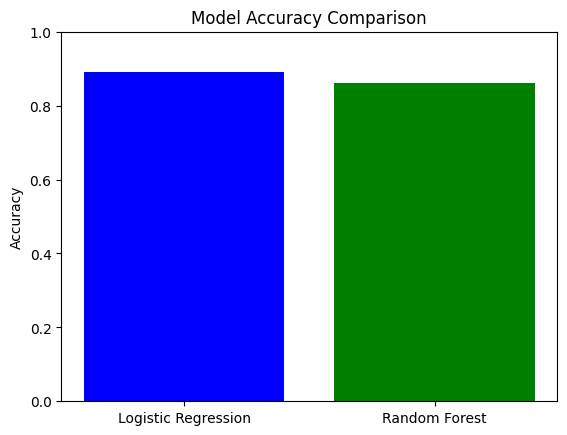

In [59]:
plt.bar(['Logistic Regression', 'Random Forest'], [accuracy_logreg, accuracy_rf], color=['blue', 'green'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

## Export Model with the highest accuracy

In [60]:
from joblib import dump

dump(logreg_model, 'logreg_model.joblib')
print('Model saved as logreg_model.joblib')

Model saved as logreg_model.joblib
